In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data = data[['sepal length (cm)', 'sepal width (cm)']]
data_variety = iris.target

In [5]:
data

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_variety, test_size=0.30)

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [8]:
lda = LinearDiscriminantAnalysis()

In [9]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [10]:
lda.predict(X_test)

array([0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 0, 2, 2, 2, 1, 0, 0, 2, 1, 2, 1, 1,
       0, 2, 2, 0, 1, 1, 2, 0, 2, 1, 0, 0, 2, 2, 0, 0, 2, 2, 1, 2, 1, 2,
       1])

In [11]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [12]:
result

,0,1
0,0,0
1,0,0
2,0,0
3,2,2
4,2,2
5,2,2
6,1,1
7,1,1
8,1,1
9,1,1


In [13]:
from sklearn.metrics import accuracy_score

In [14]:
accuracy_score(y_test, lda.predict(X_test))

0.8666666666666667

In [15]:
lda.coef_

array([[-5.50370209,  8.01399701],
       [ 2.00337521, -4.26580784],
       [ 4.10985843, -4.46715022]])

In [16]:
# центроиды
lda.means_

array([[5.06486486, 3.45405405],
       [5.91666667, 2.75      ],
       [6.5375    , 2.971875  ]])

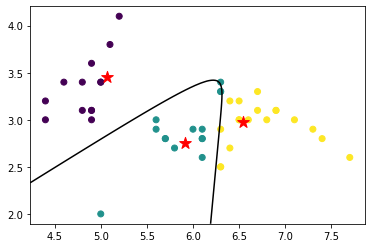

In [17]:
# сам scatter plot
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=lda.predict(X_test))

# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=1.5, colors='black')

plt.show()

## Кластеризация

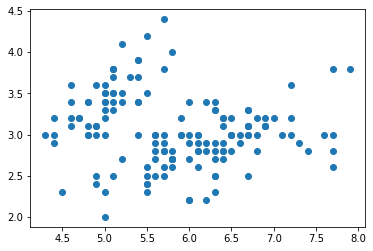

In [18]:
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'])

In [19]:
# приведем данные к единому масштабу, хотя в нашем случае они и так в одной размерности и одного порядка
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
X_scaled = scaler.fit_transform(data)

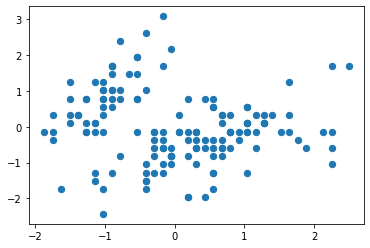

In [22]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', s=40)

In [23]:
from sklearn.cluster import KMeans

In [24]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int32)

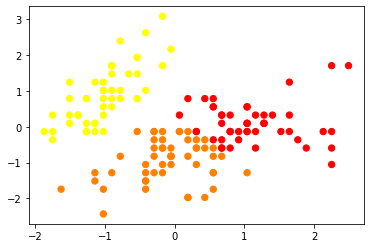

In [25]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=40)

In [26]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

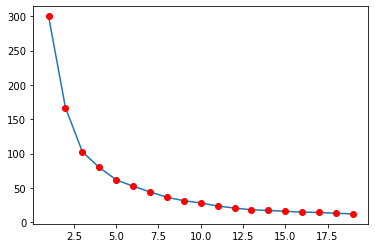

In [27]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')